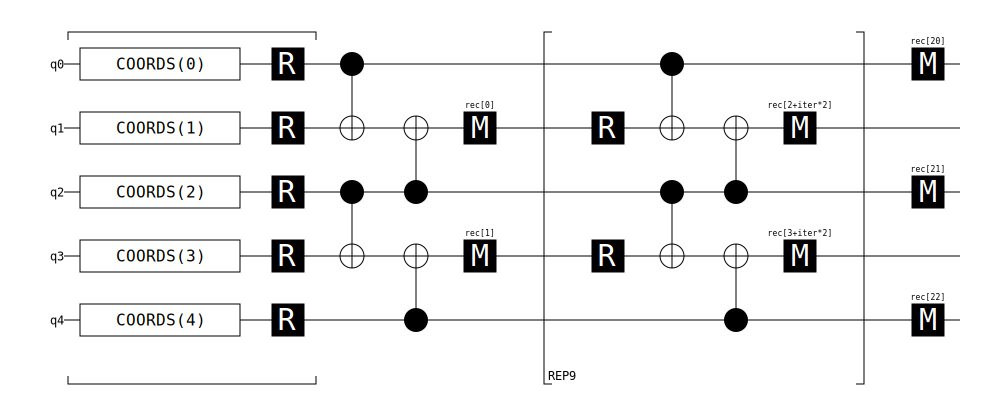

In [2]:
import stim

circuit = stim.Circuit("""
QUBIT_COORDS(0) 0
QUBIT_COORDS(1) 1
QUBIT_COORDS(2) 2
QUBIT_COORDS(3) 3
QUBIT_COORDS(4) 4
R 0 1 2 3 4
TICK
CX 0 1 2 3
TICK
CX 2 1 4 3
TICK
M 1 3
TICK
REPEAT 9 {
    R 1 3
    TICK
    CX 0 1 2 3
    TICK
    CX 2 1 4 3
    TICK
    M 1 3
    TICK
}
M 0 2 4""")
circuit.diagram("timeline-svg")

In [3]:
from tqecd.fragment import split_stim_circuit_into_fragments

fragments = split_stim_circuit_into_fragments(circuit)

In [4]:
fragments

[Fragment(circuit=stim.Circuit('''
     QUBIT_COORDS(0) 0
     QUBIT_COORDS(1) 1
     QUBIT_COORDS(2) 2
     QUBIT_COORDS(3) 3
     QUBIT_COORDS(4) 4
     R 0 1 2 3 4
     TICK
     CX 0 1 2 3
     TICK
     CX 2 1 4 3
     TICK
     M 1 3
     TICK
 ''')),
 FragmentLoop(repetitions=9, fragments=[Fragment(circuit=stim.Circuit('''
     R 1 3
     TICK
     CX 0 1 2 3
     TICK
     CX 2 1 4 3
     TICK
     M 1 3
     TICK
 '''))]),
 Fragment(circuit=stim.Circuit('''
     M 0 2 4
 '''))]

In [5]:
for fragment in fragments:
    print("=" * 80)
    print(fragment)

Fragment(circuit=stim.Circuit('''
    QUBIT_COORDS(0) 0
    QUBIT_COORDS(1) 1
    QUBIT_COORDS(2) 2
    QUBIT_COORDS(3) 3
    QUBIT_COORDS(4) 4
    R 0 1 2 3 4
    TICK
    CX 0 1 2 3
    TICK
    CX 2 1 4 3
    TICK
    M 1 3
    TICK
'''))
FragmentLoop(repetitions=9, fragments=[Fragment(circuit=stim.Circuit('''
    R 1 3
    TICK
    CX 0 1 2 3
    TICK
    CX 2 1 4 3
    TICK
    M 1 3
    TICK
'''))])
Fragment(circuit=stim.Circuit('''
    M 0 2 4
'''))


In [6]:
from tqecd.flow import build_flows_from_fragments

flows = build_flows_from_fragments(fragments)

In [7]:
for flow in flows:
    print("=" * 80)
    print("Flow(")
    print("  creation = [")
    for creation in flow.creation:
        print(f"    {creation}")
    print("  ],")
    print("  destruction = [")
    for destruction in flow.destruction:
        print(f"    {destruction}")
    print("  ],")
    print(f"total_number_of_measurements = {flow.total_number_of_measurements}")
    print(")")

Flow(
  creation = [
    BoundaryStabilizers(stabilizer=Z0, collapsing_operations=[Z3, Z1], measurements=[], resets={0}, is_forward=True)
    BoundaryStabilizers(stabilizer=Z0*Z1*Z2, collapsing_operations=[Z3, Z1], measurements=[RelativeMeasurementLocation(offset=-2, qubit_index=1)], resets={1}, is_forward=True)
    BoundaryStabilizers(stabilizer=Z2, collapsing_operations=[Z3, Z1], measurements=[], resets={2}, is_forward=True)
    BoundaryStabilizers(stabilizer=Z2*Z3*Z4, collapsing_operations=[Z3, Z1], measurements=[RelativeMeasurementLocation(offset=-1, qubit_index=3)], resets={3}, is_forward=True)
    BoundaryStabilizers(stabilizer=Z4, collapsing_operations=[Z3, Z1], measurements=[], resets={4}, is_forward=True)
  ],
  destruction = [
    BoundaryStabilizers(stabilizer=Z0*Z1*Z2, collapsing_operations=[Z2, Z4, Z0, Z1, Z3], measurements=[RelativeMeasurementLocation(offset=-2, qubit_index=1)], resets={0, 1, 2}, is_forward=False)
    BoundaryStabilizers(stabilizer=Z2*Z3*Z4, collapsing_op

In [8]:
flows[0].creation

[BoundaryStabilizers(stabilizer=Z0, collapsing_operations=[Z3, Z1], measurements=[], resets={0}, is_forward=True),
 BoundaryStabilizers(stabilizer=Z0*Z1*Z2, collapsing_operations=[Z3, Z1], measurements=[RelativeMeasurementLocation(offset=-2, qubit_index=1)], resets={1}, is_forward=True),
 BoundaryStabilizers(stabilizer=Z2, collapsing_operations=[Z3, Z1], measurements=[], resets={2}, is_forward=True),
 BoundaryStabilizers(stabilizer=Z2*Z3*Z4, collapsing_operations=[Z3, Z1], measurements=[RelativeMeasurementLocation(offset=-1, qubit_index=3)], resets={3}, is_forward=True),
 BoundaryStabilizers(stabilizer=Z4, collapsing_operations=[Z3, Z1], measurements=[], resets={4}, is_forward=True)]